# Project2 > Vanguard Digital Experiment 
EDA & Data Cleaning

1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

2. Load Data

In [4]:
# Load datasets

demo = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_demo.txt")
web1 = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_web_data_pt_1.txt")
web2 = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_web_data_pt_2.txt")
exp = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_experiment_clients.txt")


# Merge the two web data parts
web_data = pd.concat([web1, web2], ignore_index=True)

print('Demo shape:', demo.shape)
print('Web data shape:', web_data.shape)
print('Experiment shape:', exp.shape)

Demo shape: (70609, 9)
Web data shape: (755405, 5)
Experiment shape: (70609, 2)


3. Inspect Data

In [12]:
# Quick look at each dataset
print('\nDemo Data Preview:')
demo.head()

print('\nWeb Data Preview:')
web_data.head()

print('\nExperiment Data Preview:')
exp.head()


Demo Data Preview:

Web Data Preview:

Experiment Data Preview:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
demo.info()
web_data.info()
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-n

Data Info and Summary

In [ ]:
demo.info()
web_data.info()
exp.info()

# Basic statistics
demo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-n

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595,70595.000000,7.059500e+04,70595.000000,70595.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,24122,NaN,NaN,NaN,NaN
mean,5.004992e+06,12.052950,150.659367,46.442240,NaN,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,NaN,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,NaN,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,NaN,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,NaN,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,NaN,2.000000,1.375449e+05,6.000000,7.000000


In [ ]:
demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [22]:
exp.isnull().sum()
exp_clean = exp.dropna(subset=['Variation'])
exp = exp_clean

In [23]:
exp.isnull().sum()

client_id    0
Variation    0
dtype: int64

4. Data Cleaning

In [7]:
# Convert date_time to datetime
web_data['date_time'] = pd.to_datetime(web_data['date_time'], errors='coerce')

# Check for missing values
print('Missing values per dataset:')
print('Demo:', demo.isna().sum().sum())
print('Web data:', web_data.isna().sum().sum())
print('Experiment:', exp.isna().sum().sum())

Missing values per dataset:
Demo: 113
Web data: 0
Experiment: 20109


Merge Datasets

In [15]:
# Merge demographics, web data, and experiment info
merged = web_data.merge(exp, on='client_id', how='left').merge(demo, on='client_id', how='left')

print('Merged dataset shape:', merged.shape)
merged.head()

Merged dataset shape: (755405, 14)


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


5. Exploratory Data Analysis (EDA)

5.1 Demographics Overview

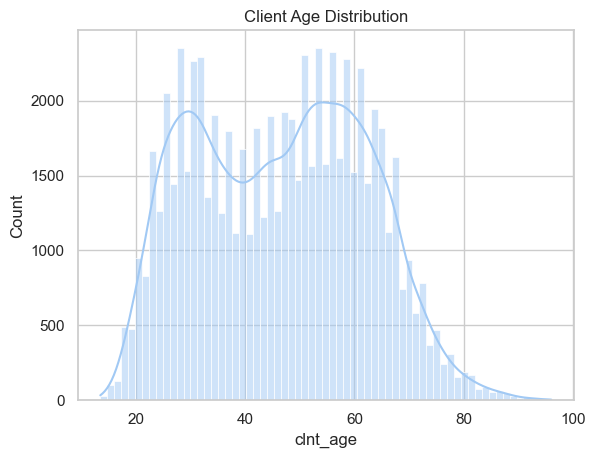

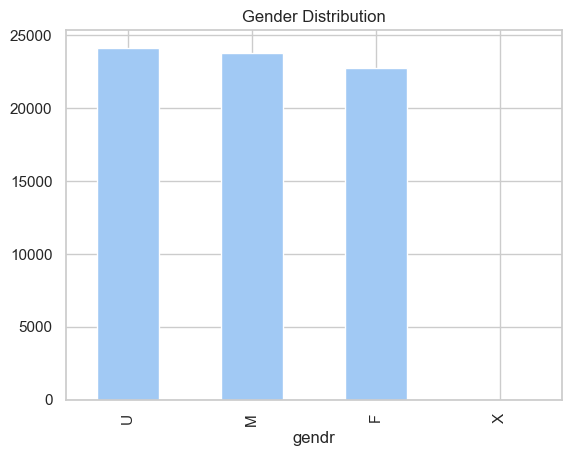

In [16]:
# Age distribution
sns.histplot(demo['clnt_age'], kde=True)
plt.title('Client Age Distribution')
plt.show()

# Gender distribution
demo['gendr'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

5.2 Client Tenure and Balance

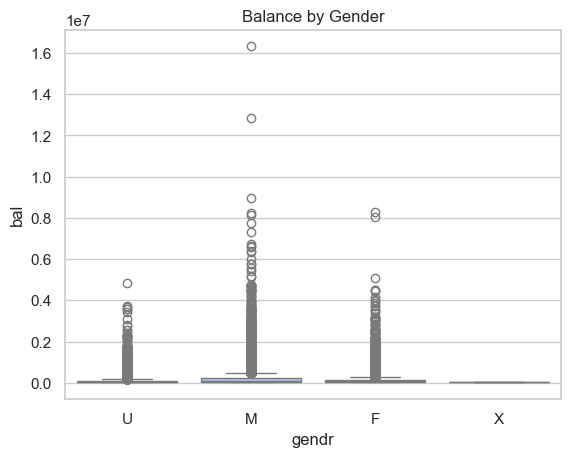

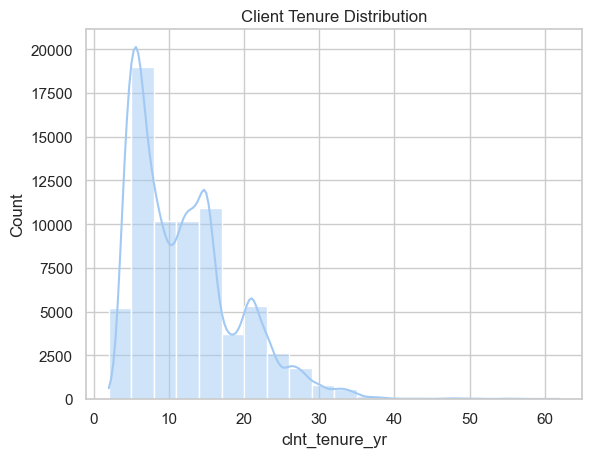

In [17]:
sns.boxplot(x='gendr', y='bal', data=demo)
plt.title('Balance by Gender')
plt.show()

sns.histplot(demo['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Client Tenure Distribution')
plt.show()

5.3 Process Behavior

##expected a column called variation inside web_data but the variation column (which tells whether a user was in control or test) lives in the df_final_experiment_clients dataset — not in the web data itself. So before grouping by variation, we need to merge the two datasets.

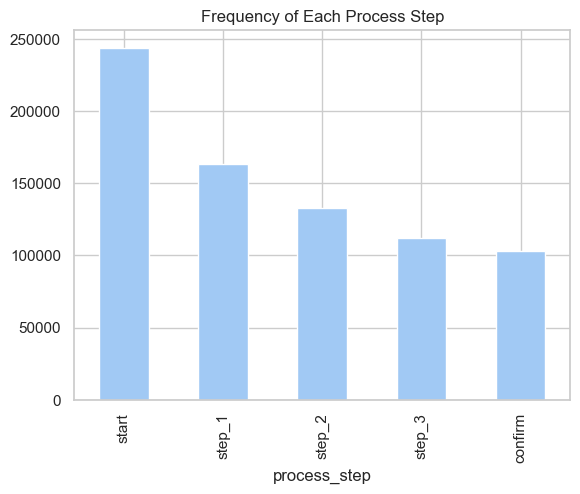

KeyError: 'variation'

In [20]:
web_data['process_step'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Process Step')
plt.show()

# Completion rate estimation
completion_counts = web_data.groupby('variation')['process_step'].apply(lambda x: (x == 'confirm').sum())
total_counts = web_data['variation'].value_counts()
completion_rate = (completion_counts / total_counts) * 100
print('Completion Rate by Variation (%):')
print(completion_rate)

5.4 Correlation Heatmap (Demographics)

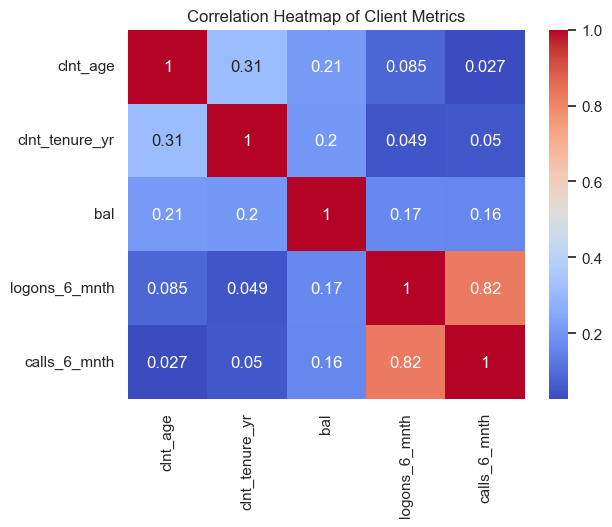

In [19]:
numeric_cols = ['clnt_age','clnt_tenure_yr','bal','logons_6_mnth','calls_6_mnth']
sns.heatmap(demo[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Client Metrics')
plt.show()

Insights

-> Who are the primary clients (age, gender, tenure)?

-> Are there visible differences between control and test groups?

-> Are there any anomalies, missing data, or outliers?